In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from MultiLabelEvolvingSNN import *
from SpikeClustering import *
import arff
import warnings
from scipy.io import loadmat
from utils import *
warnings.filterwarnings("ignore")
%matplotlib inline

## FoodTruck Dataset, Multi Label Learning

In [2]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)

train_spikes = np.array(train_spikes).squeeze(axis=1)
train_labels = np.array(train_labels)

Before converting to spikes: 
Train data shape:  (250, 33)


100%|██████████| 250/250 [00:00<00:00, 3941.42it/s]

Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)


In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': './checkpoints/foodtruck/best_f1_model0.0005_5000.pkl',
    'device': device
}

In [4]:
net = print_neurons(hparams_dict)

Label 0, S+ interneurons = 9, S- interneurons = 7
Label 1, S+ interneurons = 3, S- interneurons = 11
Label 2, S+ interneurons = 3, S- interneurons = 13
Label 3, S+ interneurons = 8, S- interneurons = 9
Label 4, S+ interneurons = 4, S- interneurons = 13
Label 5, S+ interneurons = 2, S- interneurons = 14
Label 6, S+ interneurons = 5, S- interneurons = 14
Label 7, S+ interneurons = 5, S- interneurons = 12
Label 8, S+ interneurons = 6, S- interneurons = 12
Label 9, S+ interneurons = 4, S- interneurons = 13
Label 10, S+ interneurons = 6, S- interneurons = 12
Label 11, S+ interneurons = 6, S- interneurons = 12


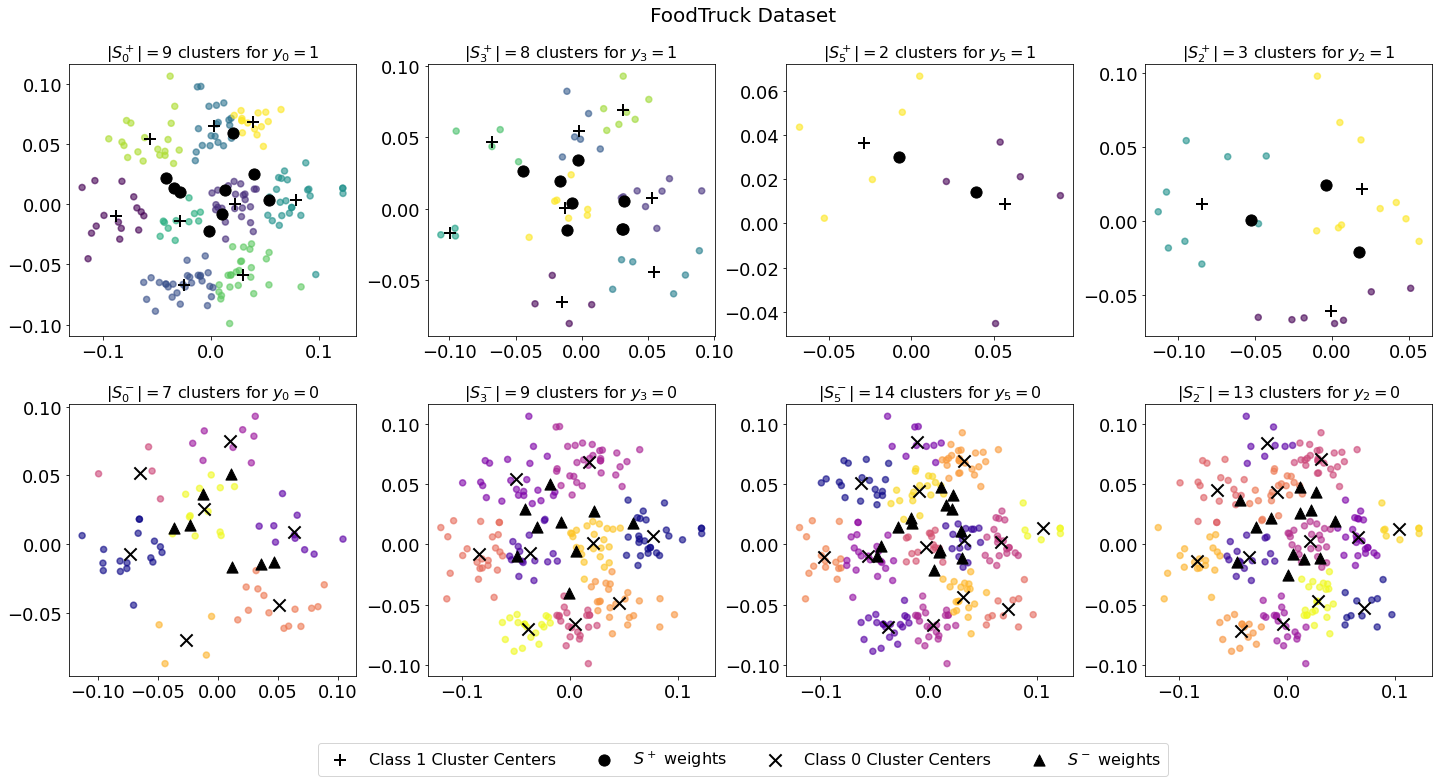

In [5]:
labels_list = [0, 3, 5, 2]
plot_spike_clusters('FoodTruck Dataset', train_spikes, train_labels, net, labels_list)

## Emotions Dataset, Multi Label Learning

In [6]:
train_path = '../datasets/emotions/emotions-train.arff'
num_features = 72

train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)

train_spikes = np.array(train_spikes).squeeze(axis=1)
train_labels = np.array(train_labels)

100%|██████████| 391/391 [00:00<00:00, 7956.09it/s]

Train data shape:  (391, 1, 432)
Train labels shape:  (391, 6)


In [7]:
hparams_dict = {
    'name': 'Emotions',
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': './checkpoints/emotions/best_f1_model0.001_2500.pkl',
    'device': device
}

In [8]:
net = print_neurons(hparams_dict)

Label 0, S+ interneurons = 5, S- interneurons = 5
Label 1, S+ interneurons = 5, S- interneurons = 5
Label 2, S+ interneurons = 3, S- interneurons = 7
Label 3, S+ interneurons = 3, S- interneurons = 3
Label 4, S+ interneurons = 5, S- interneurons = 4
Label 5, S+ interneurons = 6, S- interneurons = 4


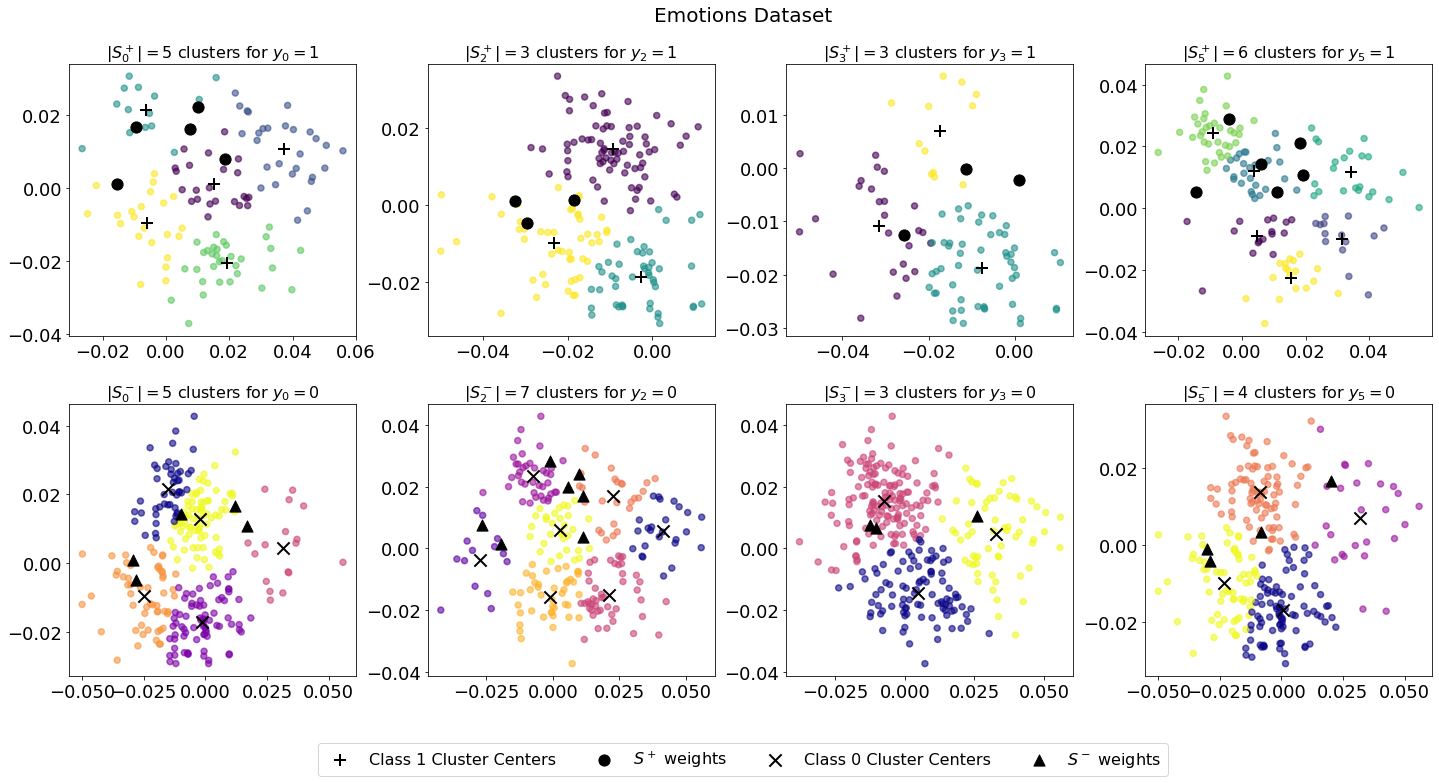

In [9]:
labels_list = [0, 2, 3, 5]
plot_spike_clusters('Emotions Dataset', train_spikes, train_labels, net, labels_list)

## Yeast Dataset, Multi Label Learning

In [2]:
train_path = '../datasets/yeast/yeast-train.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)

train_spikes = np.array(train_spikes).squeeze(axis=1)
train_labels = np.array(train_labels)

100%|██████████| 1500/1500 [00:00<00:00, 7753.53it/s]


Train data shape:  (1500, 1, 618)
Train labels shape:  (1500, 14)


In [3]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': './checkpoints/yeast/best_f1_model0.005_1000.pkl',
    'device': device,
    'name': 'Yeast'
}

In [4]:
net = print_neurons(hparams_dict)

Label 0, S+ interneurons = 2, S- interneurons = 1
Label 1, S+ interneurons = 2, S- interneurons = 1
Label 2, S+ interneurons = 2, S- interneurons = 1
Label 3, S+ interneurons = 2, S- interneurons = 1
Label 4, S+ interneurons = 2, S- interneurons = 1
Label 5, S+ interneurons = 2, S- interneurons = 1
Label 6, S+ interneurons = 2, S- interneurons = 1
Label 7, S+ interneurons = 2, S- interneurons = 1
Label 8, S+ interneurons = 2, S- interneurons = 1
Label 9, S+ interneurons = 3, S- interneurons = 1
Label 10, S+ interneurons = 2, S- interneurons = 1
Label 11, S+ interneurons = 1, S- interneurons = 2
Label 12, S+ interneurons = 1, S- interneurons = 2


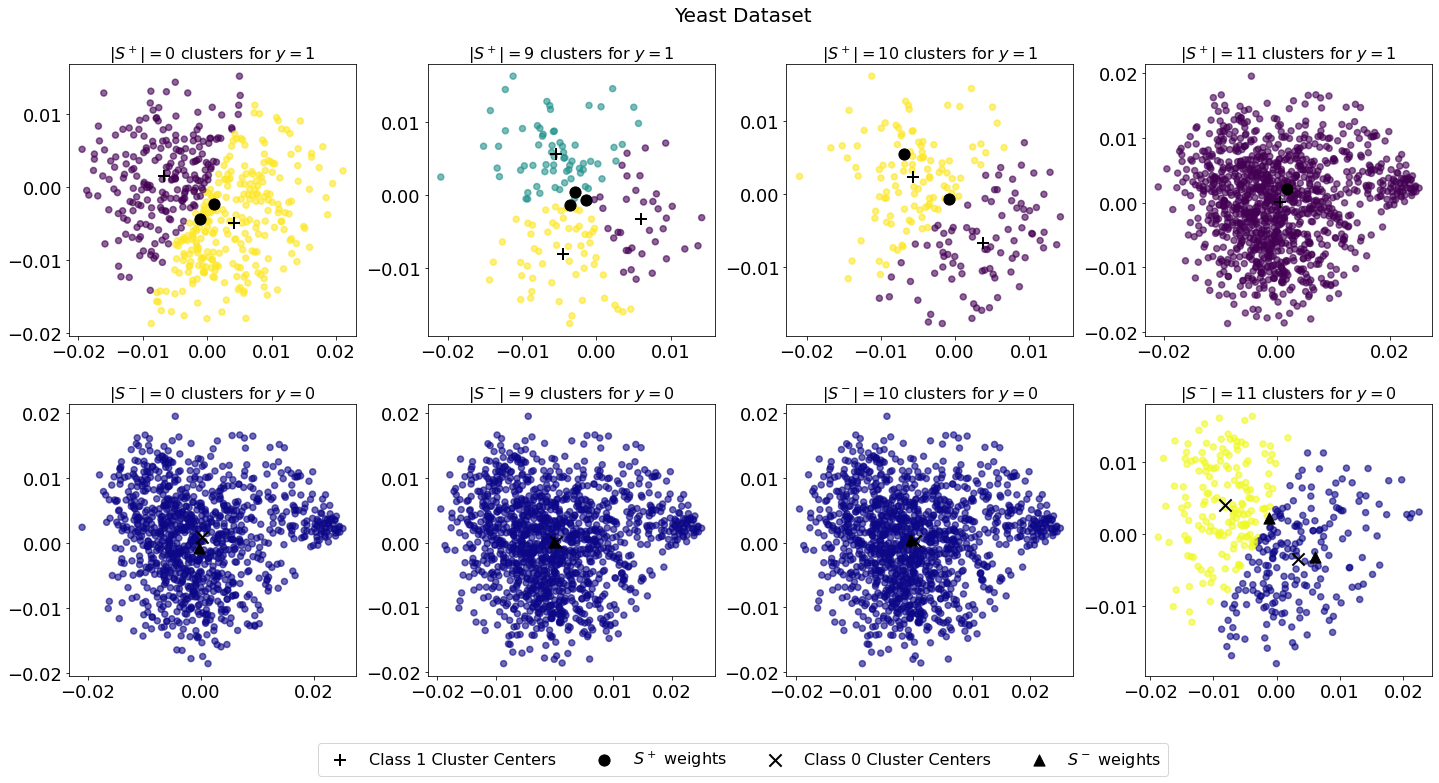

In [5]:
labels_list = [0, 9, 10, 11]
plot_spike_clusters('Yeast Dataset', train_spikes, train_labels, net, labels_list)

## Flags Dataset, Multi Label Learning

In [14]:
train_path = '../datasets/flags/flags-train.arff'
num_features = 19
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)

train_spikes = np.array(train_spikes).squeeze(axis=1)
train_labels = np.array(train_labels)

100%|██████████| 129/129 [00:00<00:00, 5934.23it/s]

Train data shape:  (129, 1, 114)
Train labels shape:  (129, 7)


In [15]:
hparams_dict = {
    'name': 'Flags',
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4500,
    'print_every': 450,
    'seed': 2,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': './checkpoints/flags/best_f1_model0.0001_4500.pkl',
    'device': device
}

In [16]:
net = print_neurons(hparams_dict)

Label 0, S+ interneurons = 5, S- interneurons = 2
Label 1, S+ interneurons = 3, S- interneurons = 4
Label 2, S+ interneurons = 5, S- interneurons = 2
Label 3, S+ interneurons = 5, S- interneurons = 4
Label 4, S+ interneurons = 6, S- interneurons = 4
Label 5, S+ interneurons = 3, S- interneurons = 5
Label 6, S+ interneurons = 3, S- interneurons = 5


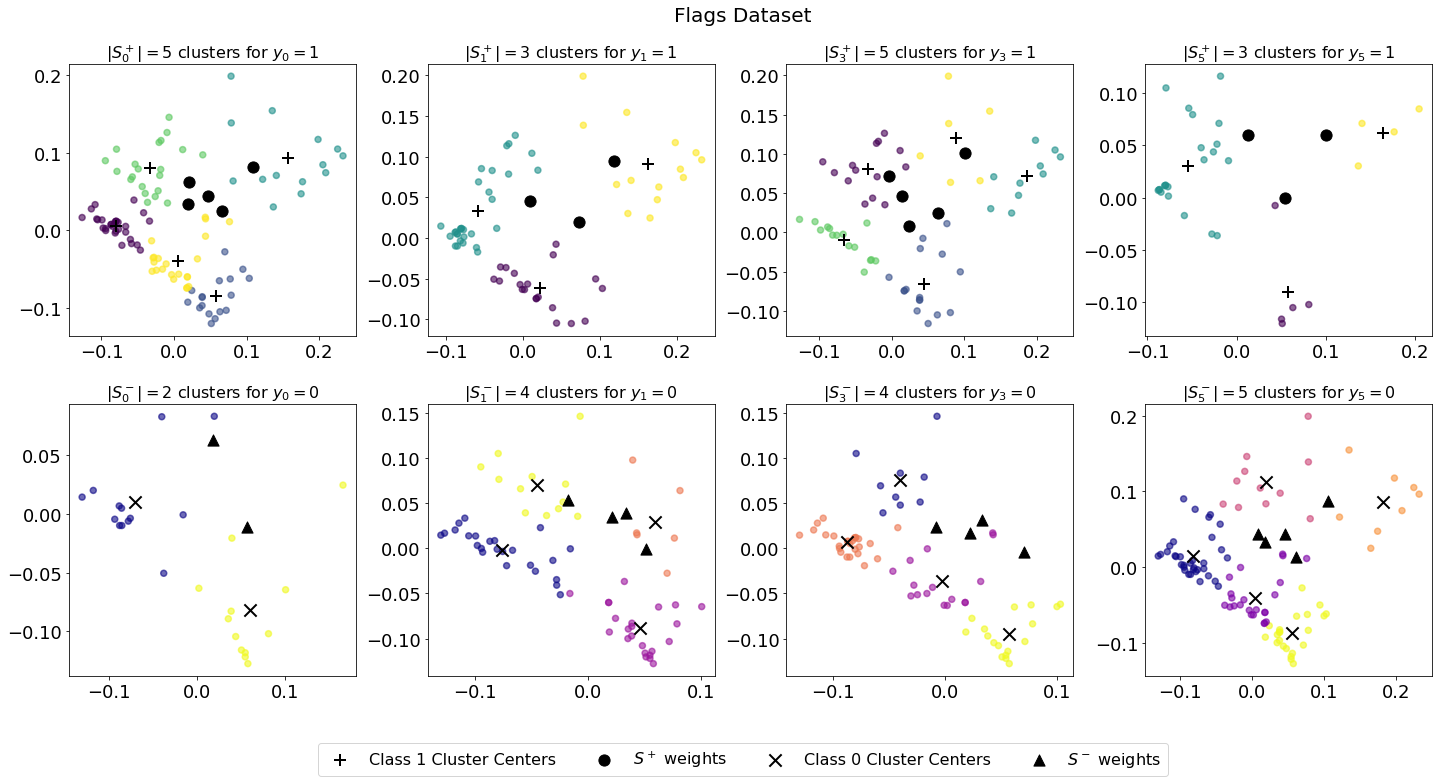

In [17]:
labels_list = [0, 1, 3, 5]
plot_spike_clusters('Flags Dataset', train_spikes, train_labels, net, labels_list)

## Virus Dataset, Multi Label Learning

In [18]:
trainpath = '../datasets/VirusPseAAC/VirusPseAAC207_train_MVMD.mat'
train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], train_['labels']

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)

train_spikes = np.array(train_spikes).squeeze(axis=1)
train_labels = np.array(train_labels)

Train data shape:  (124, 1, 300)
Train labels shape:  (124, 6)


In [19]:
hparams_dict = {
    'name': 'virus',
    'inputs': 300,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/virus/mvmd',
    'load_from_file': './checkpoints/virus/mvmd/best_f1_model0.005_1000.pkl',
    'device': device
}

In [20]:
net = print_neurons(hparams_dict)

Label 0, S+ interneurons = 1, S- interneurons = 21
Label 1, S+ interneurons = 5, S- interneurons = 33
Label 2, S+ interneurons = 9, S- interneurons = 21
Label 3, S+ interneurons = 27, S- interneurons = 26
Label 4, S+ interneurons = 19, S- interneurons = 29
Label 5, S+ interneurons = 10, S- interneurons = 24


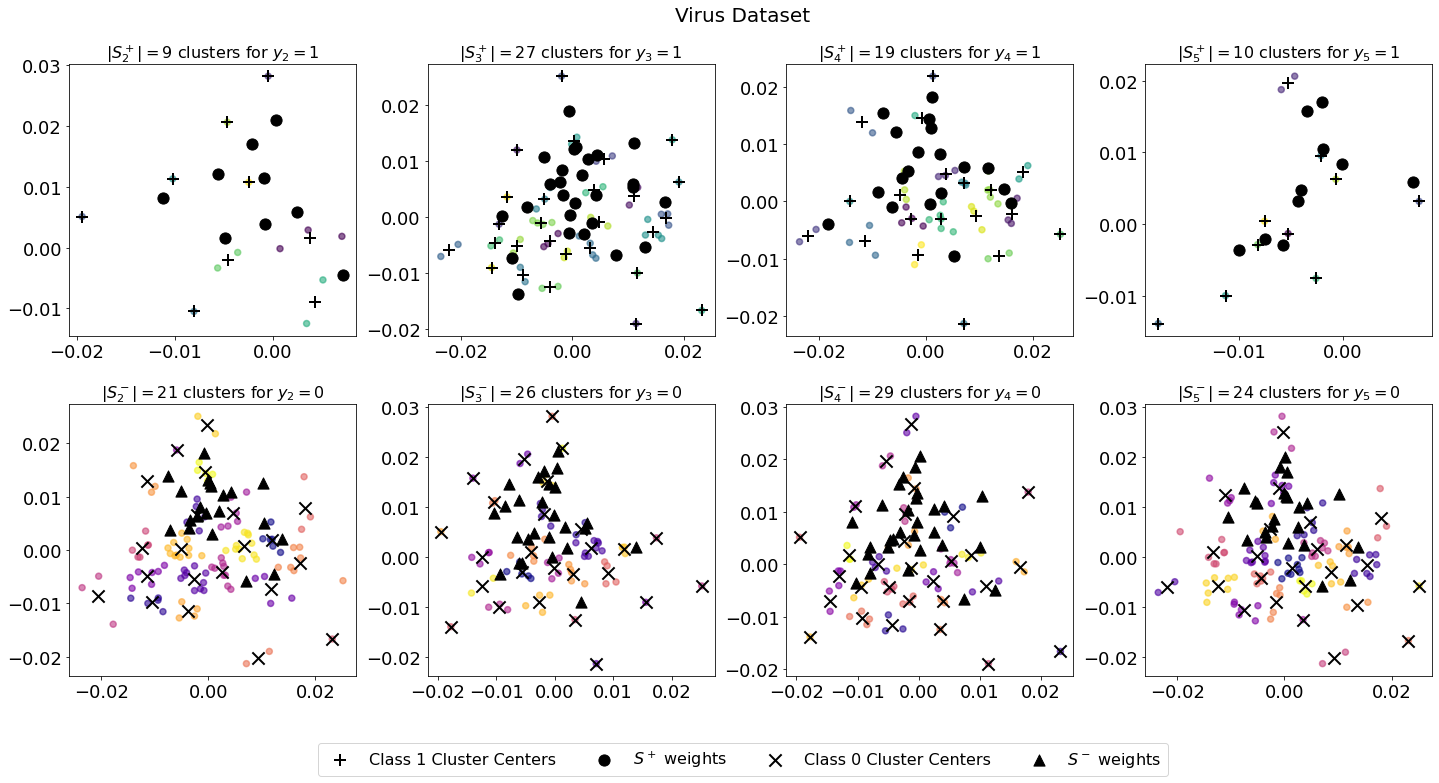

In [21]:
labels_list = [2, 3, 4, 5]
plot_spike_clusters('Virus Dataset', train_spikes, train_labels, net, labels_list)